## **Week 3**
### **Exercise:**
* Join kaggle.com and choose a real-world dataset. (This is part of your homework, try to do some research on Kaggle.)
* Download the data of your choice.
* Practice data cleaning and preprocessing, handle missing values, outliers etc.
* Explore the basic statistics with pandas methods.
* Create visualizations to understand the distribution of variables.
* Identify correlations between variables using correlation matrices and/or heatmaps.
* Derive insights from your analysis. What interesting patterns or trends did you discover?
### **Notes:**
* The goal is to gain insights into the data and present your findings through meaningful visualizations.
* Document your analysis and include code comments to explain each step of the analysis.
* Create visualizations with clear labels and titles.
* Summarize your findings in a informative manner.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [54]:
base_url = "data/"
sleep_health_url = base_url + "Sleep_health_and_lifestyle_dataset.csv"
data = pd.read_csv(sleep_health_url)

In [55]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [57]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [58]:
data["Sleep Disorder"].fillna("No", inplace=True)

In [59]:
data["Sleep Disorder"].value_counts()

Sleep Disorder
No             219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [60]:
data.drop("Person ID", inplace=True, axis=1)

In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.8,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.0,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.0,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.0,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.0,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.0,10000.0


In [62]:
cat = data.select_dtypes(include='object')
num = data.select_dtypes(include=['float64','int'])

In [63]:
num.quantile([0.1, 0.2, 0.5, 0.7,0.9, 0.95, 0.99, 1]).T

,0.10,0.20,0.50,0.70,0.90,0.95,0.99,1.00
Age,31.0,33.0,43.0,45.0,54.0,58.0,59.0,59.0
Sleep Duration,6.1,6.3,7.2,7.7,8.2,8.4,8.5,8.5
Quality of Sleep,6.0,6.0,7.0,8.0,9.0,9.0,9.0,9.0
Physical Activity Level,30.0,40.0,60.0,75.0,90.0,90.0,90.0,90.0
Stress Level,3.0,4.0,5.0,7.0,8.0,8.0,8.0,8.0
Heart Rate,65.0,68.0,70.0,72.0,75.0,78.0,85.0,86.0
Daily Steps,5000.0,5000.0,7000.0,8000.0,8000.0,10000.0,10000.0,10000.0


In [64]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [65]:
gender_bmi =data.groupby(['Gender','BMI Category']).agg({'Daily Steps': ['min', 'max', 'mean', 'median'], 'Sleep Duration': ['min', 'max', 'mean', 'median']})
gender_bmi

Daily Steps                             Sleep Duration  \
                             min    max         mean  median            min   
Gender BMI Category                                                           
Female Normal               5000   7000  6000.000000  6000.0            7.1   
       Normal Weight        4000  10000  6578.571429  7050.0            6.4   
       Obese                3300   3300  3300.000000  3300.0            7.4   
       Overweight           4200  10000  7416.037736  7000.0            5.8   
Male   Normal               5000  10000  7320.610687  8000.0            6.0   
       Normal Weight        6200   8000  7142.857143  7000.0            6.9   
       Obese                3000   3700  3355.555556  3500.0            5.9   
       Overweight           4000   6800  5828.571429  6000.0            6.1   

                                            
                      max      mean median  
Gender BMI Category                         
Female Normal         8.5  7.793750   7.75  
       Normal Weight  8.2  7.285714   7.20  
       Obese          7.4  7.400000   7.40  
       Overweight     8.2  6.880189   6.60  
Male   Normal         7.9  7.198473   7.50  
       Normal Weight  7.8  7.428571   7.50  
       Obese          8.1  6.911111   7.30  
       Overweight     7.6  6.492857   6.50

In [66]:
gender_occupation = data.groupby(['Gender', 'Occupation']).agg({'Physical Activity Level': ['mean','median','count', 'sum'], 'Stress Level': ['mean','median','count', 'sum']})
gender_occupation

Physical Activity Level                     \
                                               mean median count   sum   
Gender Occupation                                                        
Female Accountant                         58.333333   60.0    36  2100   
       Doctor                             90.000000   90.0     2   180   
       Engineer                           30.000000   30.0    32   960   
       Lawyer                             55.000000   55.0     2   110   
       Manager                            55.000000   55.0     1    55   
       Nurse                              78.589041   75.0    73  5737   
       Scientist                          41.000000   41.0     4   164   
       Teacher                            46.714286   45.0    35  1635   
Male   Accountant                         50.000000   50.0     1    50   
       Doctor                             54.347826   65.0    69  3750   
       Engineer                           74.419355   90.0    31  2307   
       Lawyer                             71.111111   60.0    45  3200   
       Sales Representative               30.000000   30.0     2    60   
       Salesperson                        45.000000   45.0    32  1440   
       Software Engineer                  48.000000   51.0     4   192   
       Teacher                            38.000000   40.0     5   190   

                            Stress Level                    
                                    mean median count  sum  
Gender Occupation                                           
Female Accountant               4.555556    4.0    36  164  
       Doctor                   3.000000    3.0     2    6  
       Engineer                 3.000000    3.0    32   96  
       Lawyer                   5.500000    5.5     2   11  
       Manager                  5.000000    5.0     1    5  
       Nurse                    5.547945    6.0    73  405  
       Scientist                7.000000    7.0     4   28  
       Teacher                  4.285714    4.0    35  150  
Male   Accountant               6.000000    6.0     1    6  
       Doctor                   6.840580    6.0    69  472  
       Engineer                 4.806452    5.0    31  149  
       Lawyer                   5.044444    5.0    45  227  
       Sales Representative     8.000000    8.0     2   16  
       Salesperson              7.000000    7.0    32  224  
       Software Engineer        6.000000    5.5     4   24  
       Teacher                  6.200000    7.0     5   31

Text(0.5, 1.0, 'Count for sleep disorder')

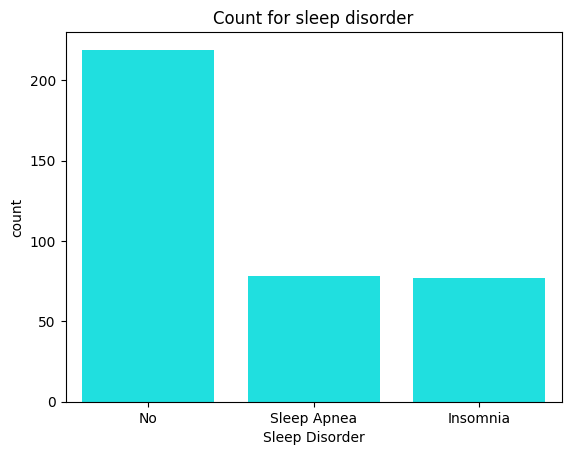

In [53]:
sns.countplot(x="Sleep Disorder", data=data, color="cyan")
plt.title('Count for sleep disorder')

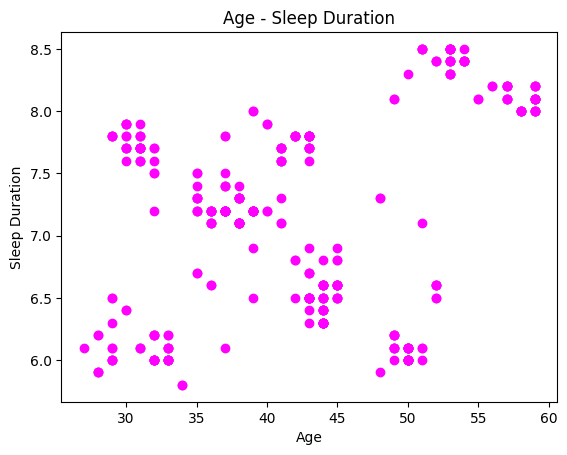

In [24]:
plt.scatter(data["Age"], data["Sleep Duration"], color="magenta")
plt.title("Age - Sleep Duration")
plt.xlabel("Age")
plt.ylabel("Sleep Duration")
plt.show()

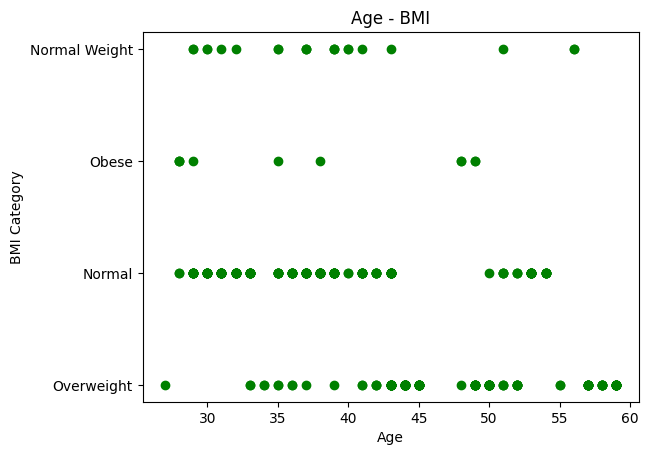

In [26]:
plt.scatter(data["Age"], data["BMI Category"], color="green")
plt.title("Age - BMI")
plt.xlabel("Age")
plt.ylabel("BMI Category")
plt.show()

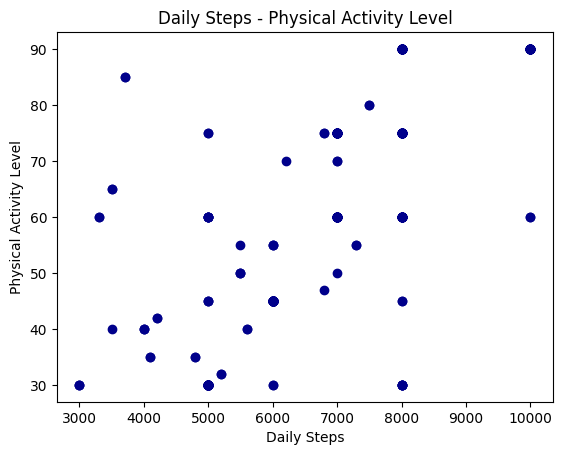

In [31]:
plt.scatter(data["Daily Steps"], data["Physical Activity Level"], color="darkblue")
plt.title("Daily Steps - Physical Activity Level")
plt.xlabel("Daily Steps")
plt.ylabel("Physical Activity Level")
plt.show()

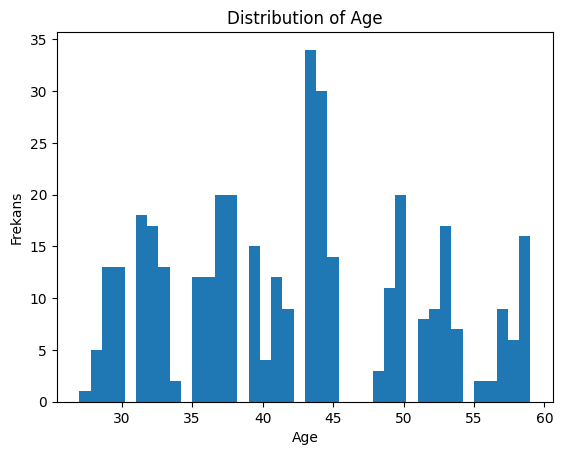

In [84]:
plt.hist(data['Age'],bins=40)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frekans")
plt.show()

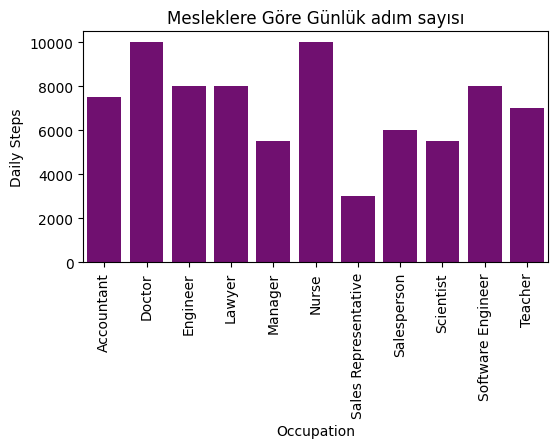

In [ ]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Occupation', y='Daily Steps', data=data.groupby('Occupation')['Daily Steps'].max().reset_index(), color="purple")
plt.xticks(rotation=90)
plt.xlabel('Occupation')
plt.ylabel('Max Daily Steps')
plt.title('Occupation - Max Daily Steps')
plt.show()

<Figure size 300x300 with 0 Axes>

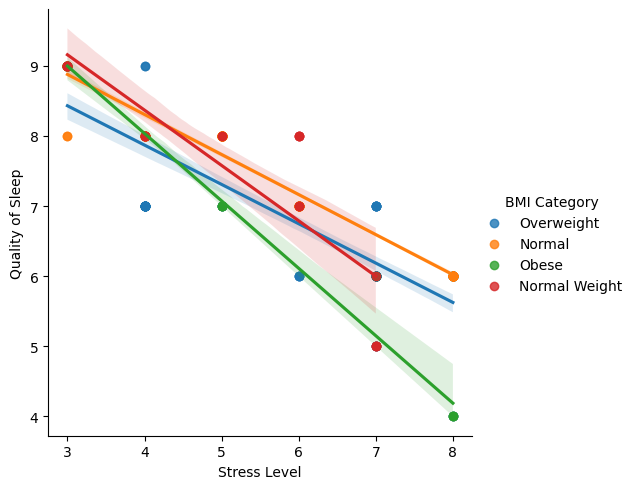

In [ ]:
sns.lmplot(x='Stress Level', y='Quality of Sleep', data=data, hue="BMI Category")

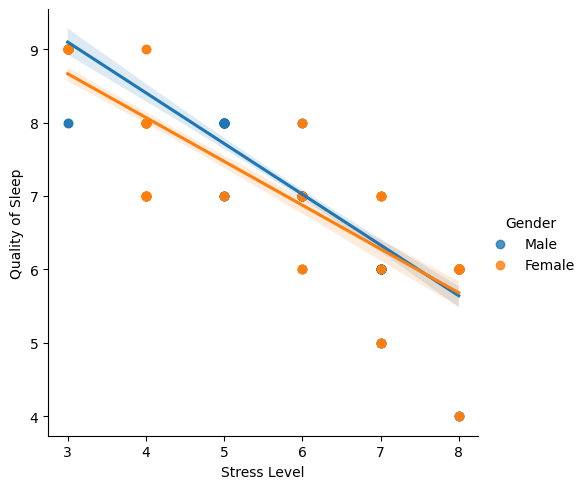

In [ ]:
sns.lmplot(x='Stress Level', y='Quality of Sleep', data=data, hue="Gender")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

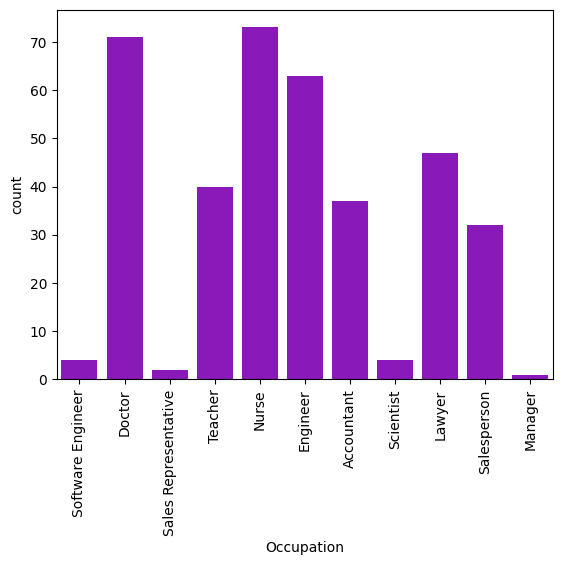

In [34]:
sns.countplot(data=data, x='Occupation', color="darkviolet")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Stress Level - Sleep Disorder')

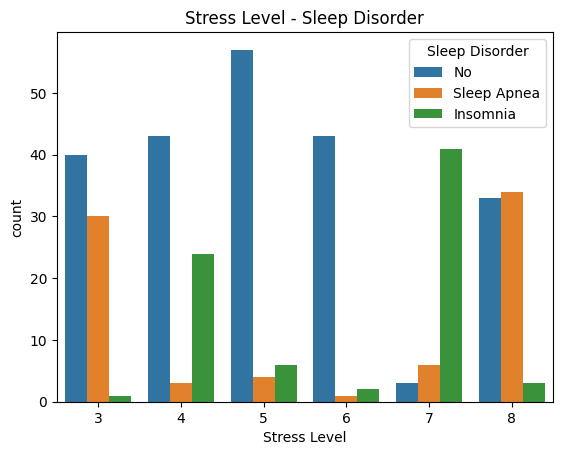

In [67]:
sns.countplot(x='Stress Level', hue='Sleep Disorder', data=data)
plt.title("Stress Level - Sleep Disorder")

Text(0.5, 1.0, 'Correlation Heatmap')

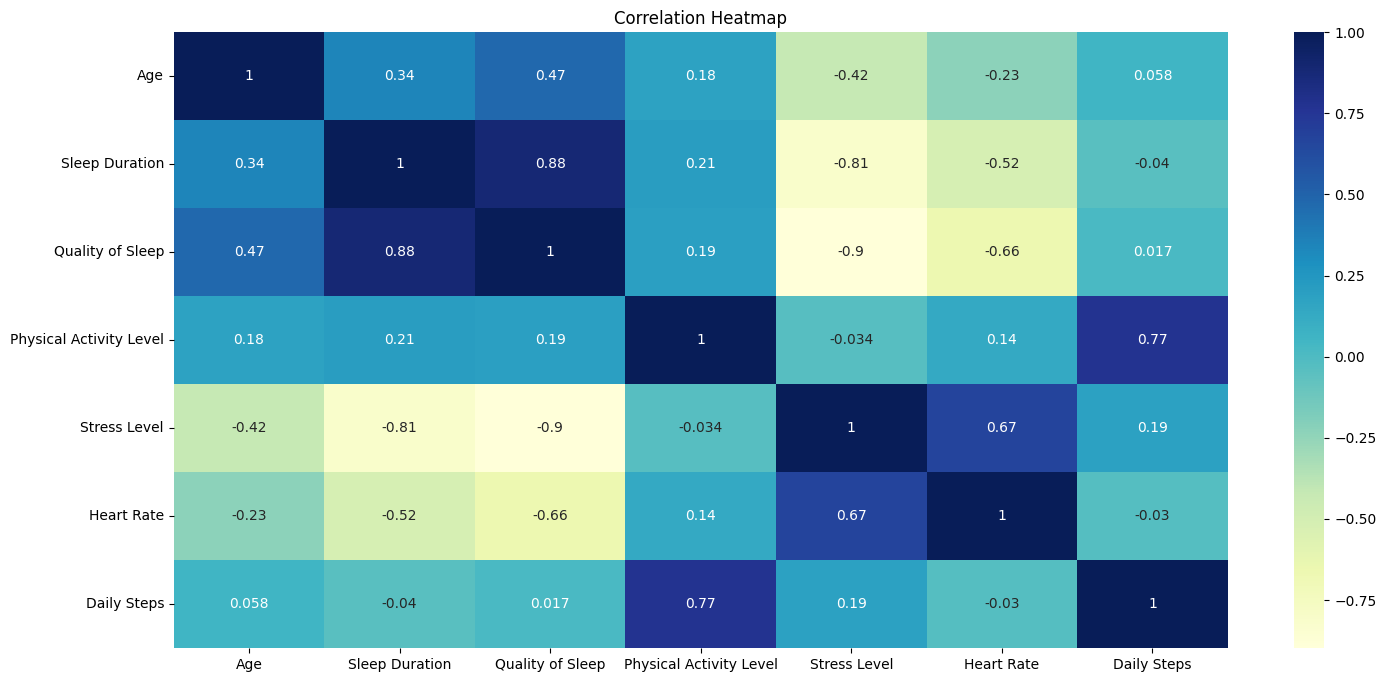

In [ ]:
corr = num.corr()
plt.figure(figsize = (17,8))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.title('Correlation Heatmap')

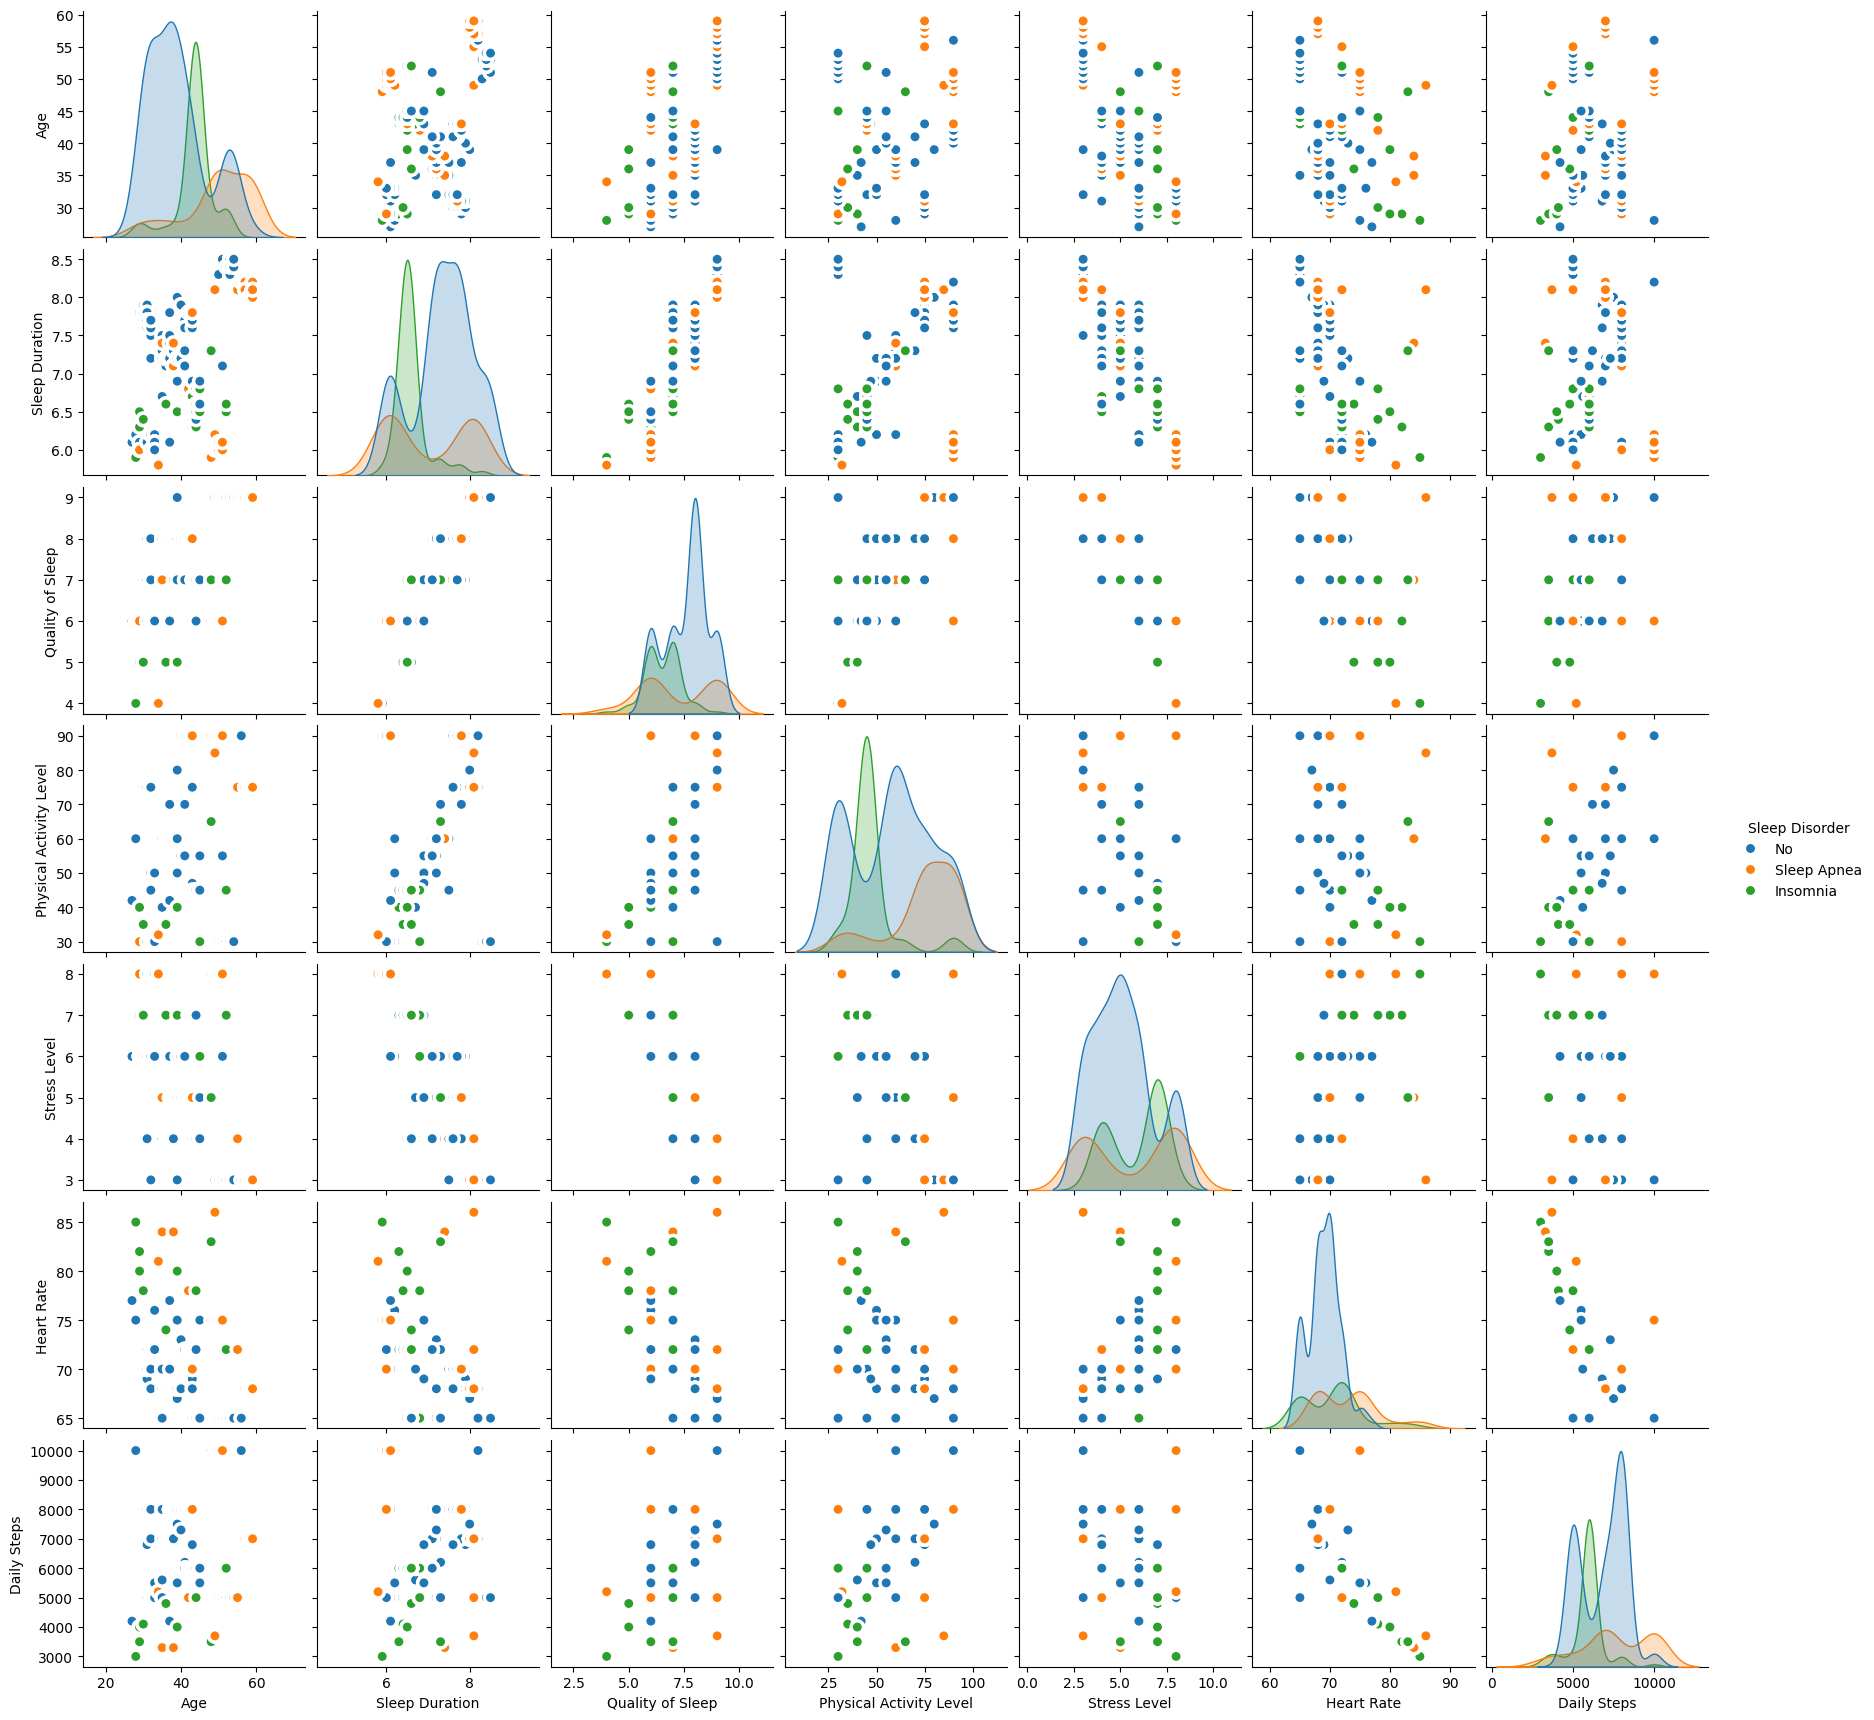

In [ ]:
sns.pairplot(data, kind="scatter", hue="Sleep Disorder", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 0x1000 with 0 Axes>

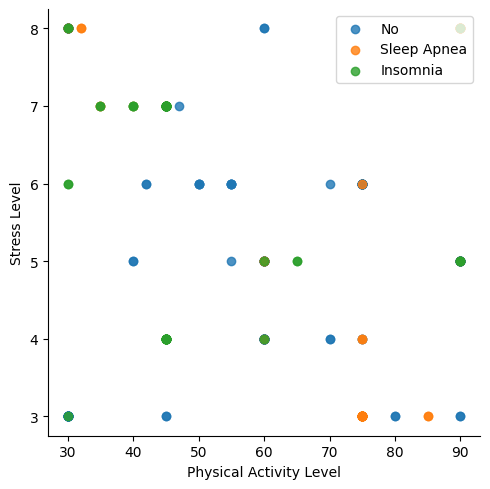

In [ ]:
plt.figure(figsize=(0,10))
sns.lmplot( x="Physical Activity Level", y="Stress Level", data=data, fit_reg=False, hue='Sleep Disorder', legend=False)
plt.legend(loc='upper right')
plt.show()

<Axes: xlabel='Sleep Duration', ylabel='Quality of Sleep'>

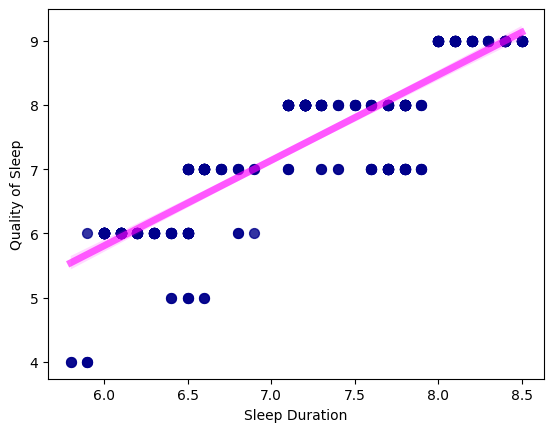

In [ ]:
sns.regplot(x=data['Sleep Duration'], y=data['Quality of Sleep'], marker= "o",
            line_kws={"color":"magenta", "alpha":0.6, "lw":5},
            scatter_kws={"color":"darkblue", "s":50})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

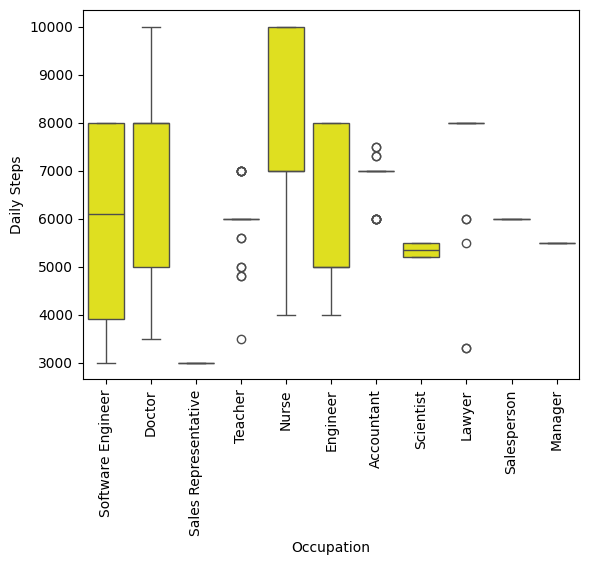

In [ ]:
sns.boxplot( x=data["Occupation"], y=data["Daily Steps"], color="yellow")
plt.xticks(rotation=90)

<Axes: xlabel='Age', ylabel='Density'>

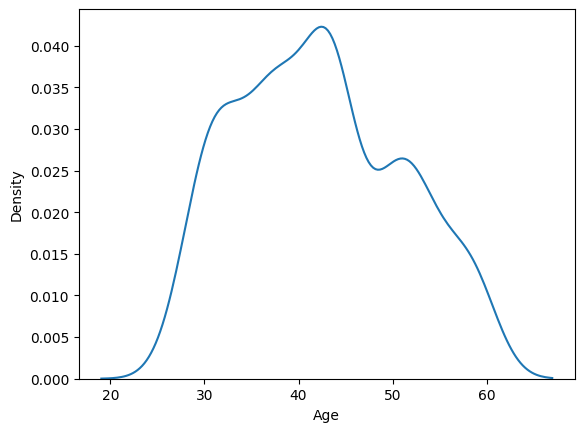

In [41]:
sns.kdeplot(data["Age"])

In [75]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


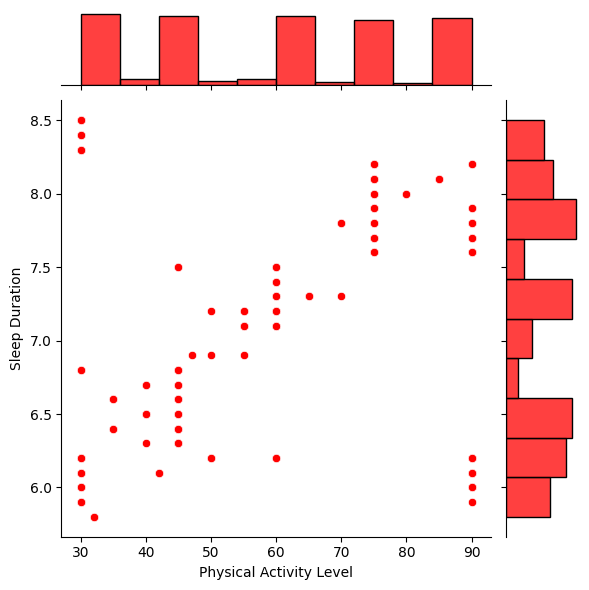

In [76]:
# Ortak dağılım grafiği, saçılım grafiği ile histogramı birleştirerek bize iki değişkenli dağılımlar hakkında detaylı bilgi verir.
sns.jointplot(x='Physical Activity Level', y='Sleep Duration', data = data, color="red")

<Axes: xlabel='Age', ylabel='Density'>

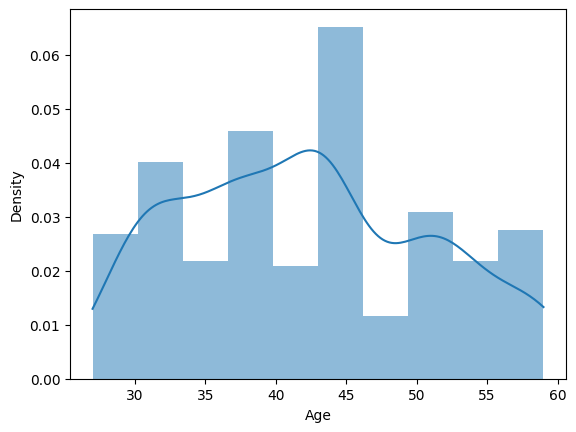

In [83]:
sns.histplot (data["Age"], kde=True, stat="density", linewidth=0)